<a href="https://colab.research.google.com/github/VegaSera/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Wesley_Mountford_LS_DS12_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

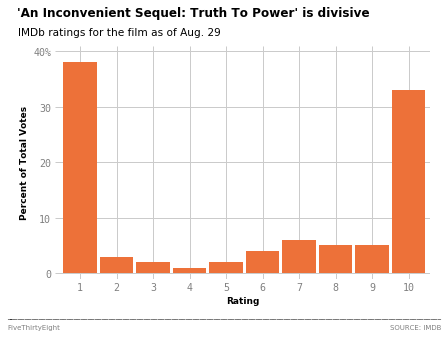

In [2]:
import matplotlib.pyplot as plt #All the imports we need
import pandas as pd
import numpy as np

plt.style.use('fivethirtyeight') #Setting style

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fig, ax= plt.subplots()

fake.plot.bar(color='#ED7139', width=0.92)

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", loc='left', color='black', fontsize='12', fontweight='bold', x=-0.1, y=1.1)
ax.text(s='IMDb ratings for the film as of Aug. 29', x=-1.7, y=42.9, color='black', fontsize=10.5)
ax.set_xlabel('Rating', color='black', fontsize=9, fontweight='bold')
ax.set_ylabel('Percent of Total Votes', color='black', fontsize=9, fontweight='bold')
ax.set_xticklabels(range(1,11),color='gray', rotation='horizontal', fontsize=10,  fontname="monospace")
ax.set_yticklabels([0,10,20, 30, '40%'], color='gray', fontsize=10, fontname="monospace")
ax.set_yticks(ticks=range(0,45,10))
ax.text(s='FiveThirtyEight', color='gray', fontsize=7, x=-2, y=-10)
ax.text(s='SOURCE: IMDB', color='gray', fontsize=7, x=8.5, y=-10)
ax.text(s='___________________________________________________________________' # A fairly 'hacky' way to do it, but couldn't find a good way to create just a solid line anywhere. But if it works, it works.
          '_________________________________________________________', color='black', fontsize=7, x=-2, y=-8)

for side in ['top', 'left', 'bottom', 'right']: #Setting all sides visibility to false, so the tick marks would appear.
  ax.spines[side].set_visible(False)

ax.set_xlim(left=-0.7, right=9.6) #Setting x and y limits, for tick marks.
ax.set_ylim(bottom=-1, top=41)

fig.patch.set(facecolor='white')
ax.set_facecolor(color='white')

In [3]:
!wget https://media.githubusercontent.com/media/fivethirtyeight/data/master/scrabble-games/scrabble_games.csv #Download the Scrabble data

--2020-01-17 02:50:30--  https://media.githubusercontent.com/media/fivethirtyeight/data/master/scrabble-games/scrabble_games.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164319282 (157M) [text/plain]
Saving to: ‘scrabble_games.csv.1’

scrabble_games.csv. 100%[===================>] 156.71M   234MB/s    in 0.7s    

2020-01-17 02:50:34 (234 MB/s) - ‘scrabble_games.csv.1’ saved [164319282/164319282]



In [4]:
from IPython.display import display, Image

url1 = 'https://fivethirtyeight.com/wp-content/uploads/2017/04/roeder-scrabble-1.png?w=575'
scrabble1 = Image(url=url1, width=400)

display(scrabble1)

In [6]:
#First up, let's determine what we need for the two graphs listed. 
#The graph appears to be a pair of bar charts. Losing scores in red, winning scores in green, 
#although I have the feeling that the losing score's zero isn't always on the 0 line, and starts on 
#top of the winning scores. Otherwise it implies there are many more losing scores as a whole than winning scores.
#For this graph I need a count of each winner score and loser score, and that's about all.

#So we need winning scores, losing scores, and the date. The rest of the data isn't useful to us for our purposes. ##The date was for a second graph on that page which proved to be a bit more than I could chew after the difficulties with the first.
df = pd.read_csv('scrabble_games.csv')
df2 = df[['winnerscore', 'loserscore', 'date']]
print(df2.shape)
df2.head(20) #That looks like a lot of zeroes for scores...

(1542642, 3)


,winnerscore,loserscore,date
0,0,0,1998-12-06
1,0,0,1998-12-06
2,0,0,1998-12-06
3,0,0,1998-12-06
4,0,0,1998-12-06
5,0,0,1998-12-06
6,0,0,1998-12-06
7,0,0,1998-12-06
8,0,0,1998-12-06
9,0,0,1998-12-06


In [7]:
df2['winnerscore'].value_counts() 
#Almost exactly half of our results have no winner score and we have some negative scores somehow. Let's get rid of those.
df2 = df2[df2['winnerscore']>0]
df2.describe()

,winnerscore,loserscore
count,770761.000000,770761.000000
mean,415.202618,336.394664
std,51.407354,45.740879
min,1.000000,-50.000000
25%,379.000000,307.000000
50%,411.000000,337.000000
75%,446.000000,367.000000
max,803.000000,585.000000


In [8]:
#The describe shows us we also have negative loser scores. I can only assume these negative scores are the result of penalties, but for the sake of our graph we'll get rid of those too.
df2 = df2[df2['loserscore']>0]
df2.describe()

,winnerscore,loserscore
count,770653.000000,770653.000000
mean,415.225188,336.442300
std,51.331941,45.566496
min,13.000000,1.000000
25%,379.000000,307.000000
50%,411.000000,337.000000
75%,446.000000,367.000000
max,803.000000,585.000000


In [9]:
df2['date'].describe()

count         770653
unique          2339
top       2004-08-01
freq           12256
Name: date, dtype: object

In [0]:
df2['date'] = pd.to_datetime(df2['date'], infer_datetime_format=True) #Changing our dates into something we can do things with.

In [11]:
df2['date'].describe()
#Hmm... still showing as object dtype. Something is weird in there. Since we plan to sort specific dates out anyway it might not be an issue.

count                  770653
unique                   2339
top       2004-08-01 00:00:00
freq                    12256
first     1976-12-05 00:00:00
last      2017-03-05 00:00:00
Name: date, dtype: object

In [0]:
#for this first graph, our table truncates after 800 points. Let's do that to our data as well
df2 = df2[df2['winnerscore']<800]
df2 = df2[df2['loserscore']<800]#This line is probably redundant, but including it just in case someone lost with more points on some technicality.
#df2[['winnerscore', 'loserscore']].plot.bar(stacked=True) #Tried this originally, turns out that making a bar chart with three quarters of a million entries is extremely slow.
winnercount = df2['winnerscore'].value_counts()
losercount = df2['loserscore'].value_counts()
df3 = pd.DataFrame()
df3['winnercount'] = winnercount
df3['losercount'] = losercount

In [13]:
display(scrabble1)

<Figure size 576x576 with 0 Axes>

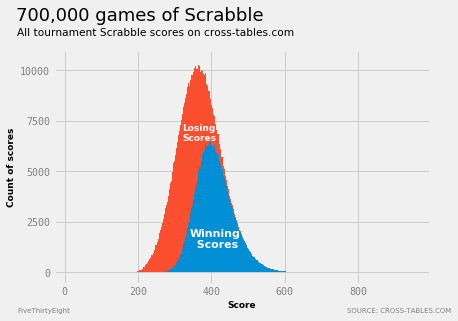

In [77]:
fig= plt.figure(figsize=(8,8));

ax2 = df3.sort_index().plot.bar(stacked=True, width=1, legend=False) #Removed the legend to be able to replicate the example better.

ax2.set_title("700,000 games of Scrabble", loc='left', color='black', fontsize='18', x=-0.1, y=1.1)
ax2.text(s='All tournament Scrabble scores on cross-tables.com', x=-300, y=11700, color='black', fontsize=10.5)
ax2.set_xlabel('Score', color='black', fontsize=9, fontweight='bold')
ax2.set_ylabel('Count of scores', color='black', fontsize=9, fontweight='bold')
ax2.set_xticklabels(range(0,801,200),color='gray', rotation='horizontal', fontsize=10,  fontname="monospace")
ax2.set_yticklabels(range(0,10001,2500), color='gray', fontsize=10, fontname="monospace")
ax2.set_yticks(ticks=range(0,10001,2500))
ax2.set_xticks(ticks=range(-170,801,200))#For some reason, setting the first value to negative was the only way I could get the graph to line up correctly. I have checked to make sure that data is consistent with the above graph, and it seems to be.
ax2.set_xlim(left=-200, right=825) #Setting x and y limits, for tick marks.
ax2.set_ylim(bottom=-550, top=11000)
ax2.text(s='FiveThirtyEight', color='gray', fontsize=7, x=-300, y=-2000)
ax2.text(s='SOURCE: CROSS-TABLES.COM', color='gray', fontsize=7, x=600, y=-2000);
ax2.text(s='Winning\n  Scores', color='white', fontweight='bold', x=170, y=1200, fontsize=11)
ax2.text(s='Losing\nScores', color='white', fontweight='bold', x=150, y=6500, fontsize=9);

#There's all sorts of weirdness going on with this graph and it's settings. 
#Negative xticks to get the graph into the right spot, 
#xlim not wanting to behave correctly (ylim seems fine). 
#The graph itself is too tall and I can't seem to resolve that.
#Did winnercount.sort_values() to make sure I wasn't misinterpreting the data, and I'm definitely not. 
#This graph behaving in the way it has been has probably been my first major roadblock so far, and the troubles probably stem from me attempting to do two graphs in one rather than keep searching for a simpler bar graph.
#Despite all that, the graph is definitely similar enough in my opinion.

In [15]:
winnercount.sort_values() #Doublechecking the most common winner values because of how they were lining up when I didn't pass that negative value above. Data is correct but the graph display was not.

201       1
682       1
173       1
685       1
88        1
       ... 
405    6364
410    6397
396    6433
404    6440
401    6495
Name: winnerscore, Length: 544, dtype: int64

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here